In [24]:
# ライブラリのインポート
# import sample_generation as sg
import numpy as np 

import matplotlib.pyplot as plt

# データの用意
# X, y = sg.line_wave()
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

boston = load_boston()

In [17]:

ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.69


In [19]:
# alpha = [1, 10, 0.1]
# symbol = ['o', 's', '^']
# for al, sym in zip(alpha, symbol):
#     ridge = Ridge(alpha=al).fit(X_train, y_train)
#     # plt.plot(ridge.coef_, sym)
#     print(ridge.coef_)

[1.12144701]
[1.0772677]
[1.12606506]


In [4]:
# データの用意と前処理
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.datasets import load_boston

import pandas as pd 

# データの準備
boston = load_boston()
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
# print(boston.DESCR)

# 前処理
# 各列最小値0, 最大値1に変換する
X = MinMaxScaler().fit_transform(boston.data)
# 各列掛け合わせて新しい列を作る
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
y = boston.target

print(X.shape)
boston_data

(506, 104)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [63]:
print('Shape of boston data: {}'.format(boston.data.shape))
print('Bunch object: {}'.format(boston.keys()))
print('boston data feature names: {}'.format(boston.feature_names))

Shape of boston data: (506, 13)
Bunch object: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
boston data feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge 

# トレーニングデータとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# 学習
ridge = Ridge().fit(X_train, y_train)

# 結果表示
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


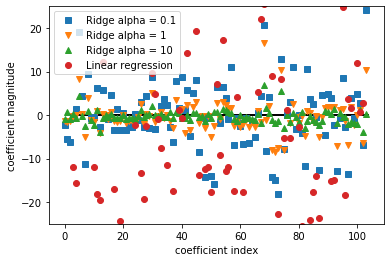

In [103]:
from sklearn.linear_model import LinearRegression
# 比較のために線形回帰の結果も載せる
lr = LinearRegression().fit(X_train, y_train)

# 可視化ライブラリ
import matplotlib.pyplot as plt

# alphaとプロットスタイル
alpha = [0.1, 1, 10]
symbol = ['s', 'v', '^']

for al, sym in zip(alpha, symbol):
    ridge = Ridge(alpha=al).fit(X_train, y_train)
    plt.plot(ridge.coef_, sym, label='Ridge alpha = {}'.format(al))
    plt.hlines(0, 0, len(ridge.coef_))

plt.plot(lr.coef_, 'o', label='Linear regression')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.ylim(-25, 25)
plt.legend()

![画像が表示されなかった時に表示される文字列](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [136]:
# モデル比較のためのモジュールをインポート
from sklearn.model_selection import learning_curve, KFold

# スコア生成
ridge_training_size, ridge_traing_scores, ridge_test_scores = learning_curve(
    ridge, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))

# オブジェクト生成
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

linR_training_size, linR_training_scores, linR_test_scores = learning_curve(
    lr, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))

print(trScores.shape) # 1つの分割法に対して20個スコアデータが得られ、行にまとまっている

(20, 20)


![axis](https://techacademy-magazine-cdn.techacademy.jp/wp-content/uploads/2018/09/df95dc3c3066e041c1a4f57d0549ad15.png)

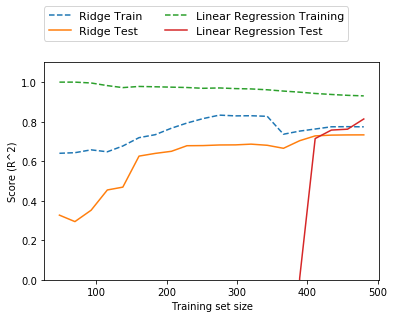

In [158]:

plt.plot(ridge_training_size, ridge_traing_scores.mean(axis=1), '--', label='Ridge Train') # 各分割法のスコア平均
plt.plot(ridge_training_size, ridge_test_scores.mean(axis=1), '-', label='Ridge Test')
plt.plot(linR_training_size, linR_training_scores.mean(axis=1), '--', label='Linear Regression Training')
plt.plot(linR_training_size, linR_test_scores.mean(axis=1), '-', label='Linear Regression Test')
plt.xlabel('Training set size')
plt.ylabel('Score (R^2)')
plt.ylim(plt.ylim(0, 1.1))
plt.legend(loc=(0, 1.1), ncol=2, fontsize=11)

In [164]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print('Training score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {:d}'.format(sum(lasso.coef_ != 0)))

# 4つしか係数が残っていない
lasso.coef_

Training score: 0.29
Test score: 0.21
Number of features used: 4


array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -5.3529079 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

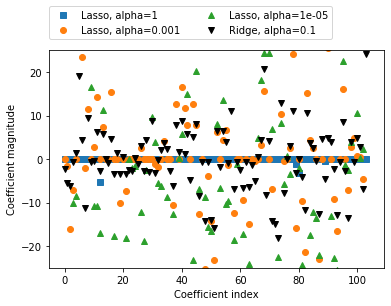

In [178]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import numpy as np

alpha = [1, 0.001, 0.00001]
symbol = ['s', 'o', '^']

for al, sym in zip(alpha, symbol):
    lasso = Lasso(alpha=al, max_iter=100000).fit(X_train, y_train)
    plt.plot(lasso.coef_, sym, label='Lasso, alpha={}'.format(al))
    plt.ylim(-25, 25)
plt.hlines(0, 0, len(lasso.coef_))

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
plt.plot(ridge.coef_, 'v', color='k', label='Ridge, alpha=0.1')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend(loc=(0, 1.05), ncol=2)


[make_blobsのcenterの意味](https://stackoverflow.com/questions/51709878/what-does-n-features-and-centers-parameters-mean-in-make-blobs-in-scikit)
結局分類で分類されるデータの種類

[n_featuresのデフォルト値は2](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [11]:
# 特徴量はデフォルトで2個
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=4, n_samples=30)
print(X)
print(y)
X, y = make_blobs(n_features=3, centers=2, random_state=4, n_samples=30)
print(X)
print(y)

[[ 9.76566918  1.27689813]
 [ 8.35760513  0.99907772]
 [ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 9.95926647  0.85665806]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [10.97634432 -0.41632061]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0]
[[ 4.59346108  2.99279969 -4.40639147]
 [ 9.38673235 -0.03834667  9.50811994]
 [ 1.9165446   3.3468928  -6.75350018]
 [ 5.13284

In [12]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

In [13]:
import numpy as np
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]
print(X2.ravel())
print(X_grid.shape)

[-0.63993225 -0.63993225 -0.63993225 ...  4.74981044  4.74981044
  4.74981044]
(1000000, 2)


[hasattr関数とは？](https://www.geeksforgeeks.org/python-hasattr-method/)

[np.array_split](https://numpy.org/doc/1.18/reference/generated/numpy.split.html)

In [14]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

In [35]:
from sklearn.svm import LinearSVC
import sys


def _call_classifier_chunked(classifier_pred_or_decide, X):

    chunk_size = 10000
    print(X.shape)
    # We use a list to collect all result chunks
    Y_result_chunks = []
    # Call the classifier in chunks.
    # 100万を1万ずつ処理
    # 10000, 20000, ..., 1000000の配列を作る
    for x_chunk in np.array_split(X, np.arange(chunk_size, X.shape[0],
                                               chunk_size, dtype=np.int32),
                                  axis=0):
        Y_result_chunks.append(classifier_pred_or_decide(x_chunk))

    return np.concatenate(Y_result_chunks)

def plot_2d_separator(classifier, X=X, fill=False, eps=None, alpha=1, threshold=None):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    print(sys.getsizeof(X_grid))
    if hasattr(classifier, "decision_function"):
        # decision_values = _call_classifier_chunked(classifier.decision_function,
        #                                            X_grid)
        decision_values = classifier.decision_function(X_grid)
        print(decision_values.shape)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    else:
        # no decision_function
        decision_values = _call_classifier_chunked(classifier.predict_proba,
                                                   X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]

def make_forge():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y

X, y = make_forge()

svc = LinearSVC().fit(X, y)
plot_2d_separator(svc, X=X, fill=False, eps=0.5, alpha=.7)


16000112
(1000000,)


In [29]:
import sys
a = [0.1, 2.3]
print(sys.getsizeof(a[1]))

24


ここから決定木

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import numpy as np 

import pandas as pd

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

Accuracy on training set: 1.000
Accuracy on test set: 0.937


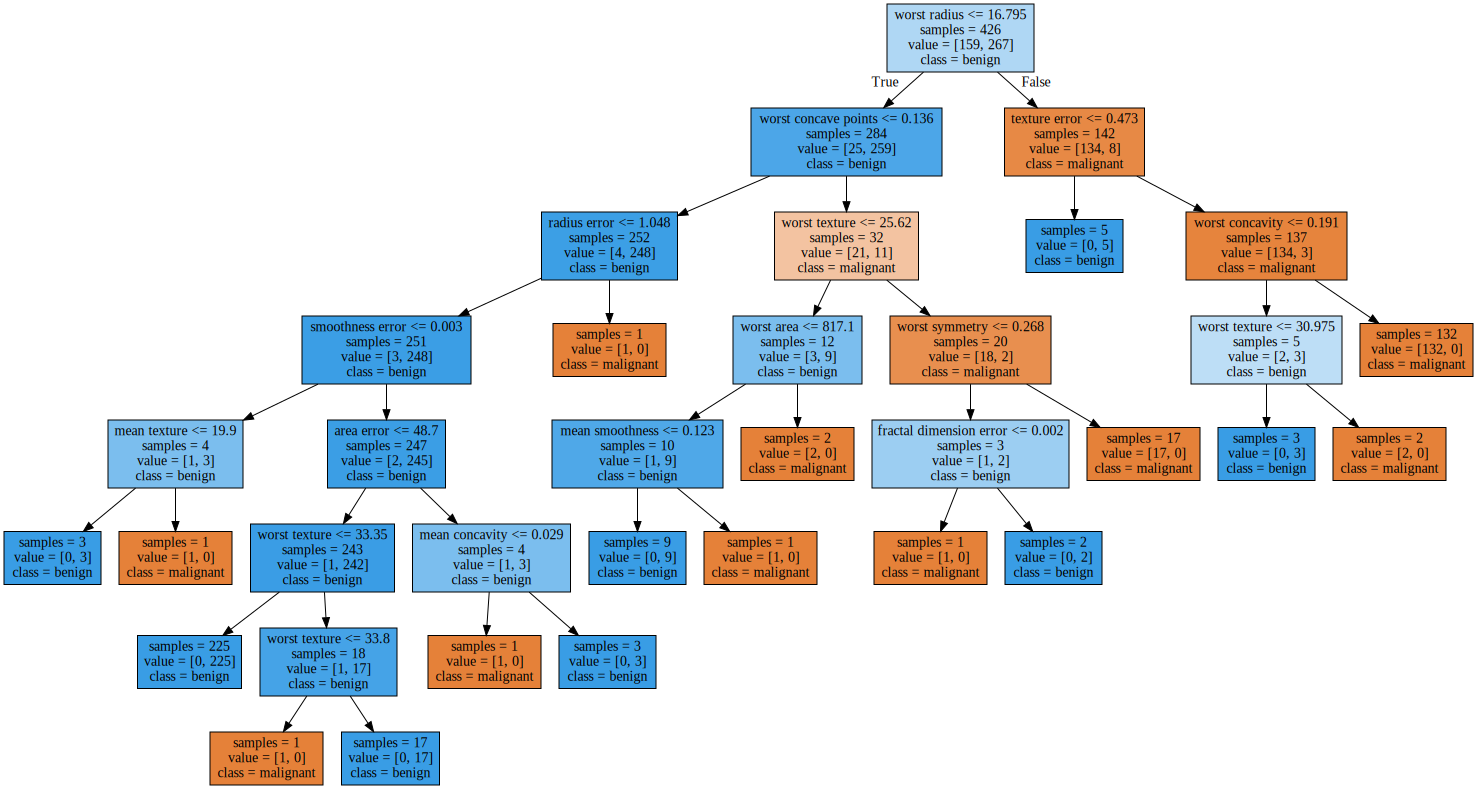

In [4]:
# stratifyを指定することで、癌と癌でないクラスが均等にtrainingデータとtestデータに分けられる。
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree2.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz 

with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)

tree.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


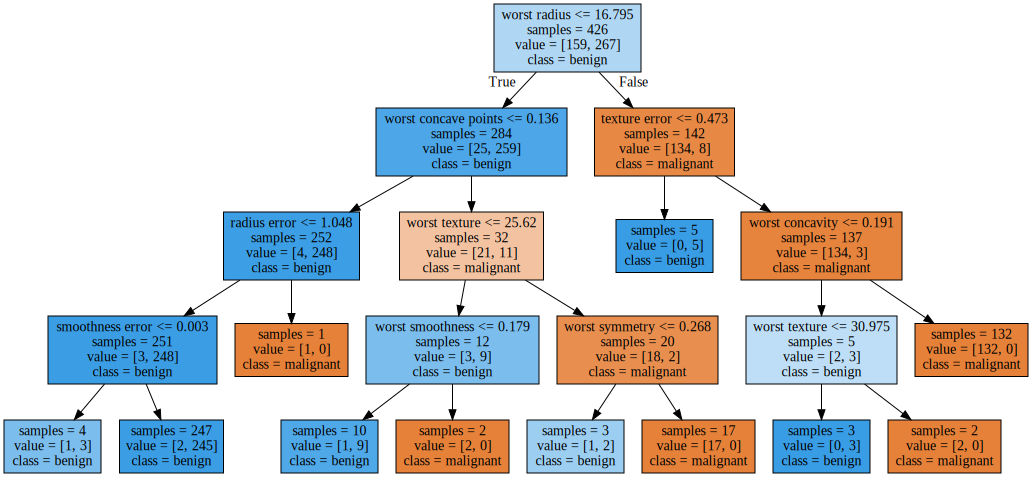

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz 

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


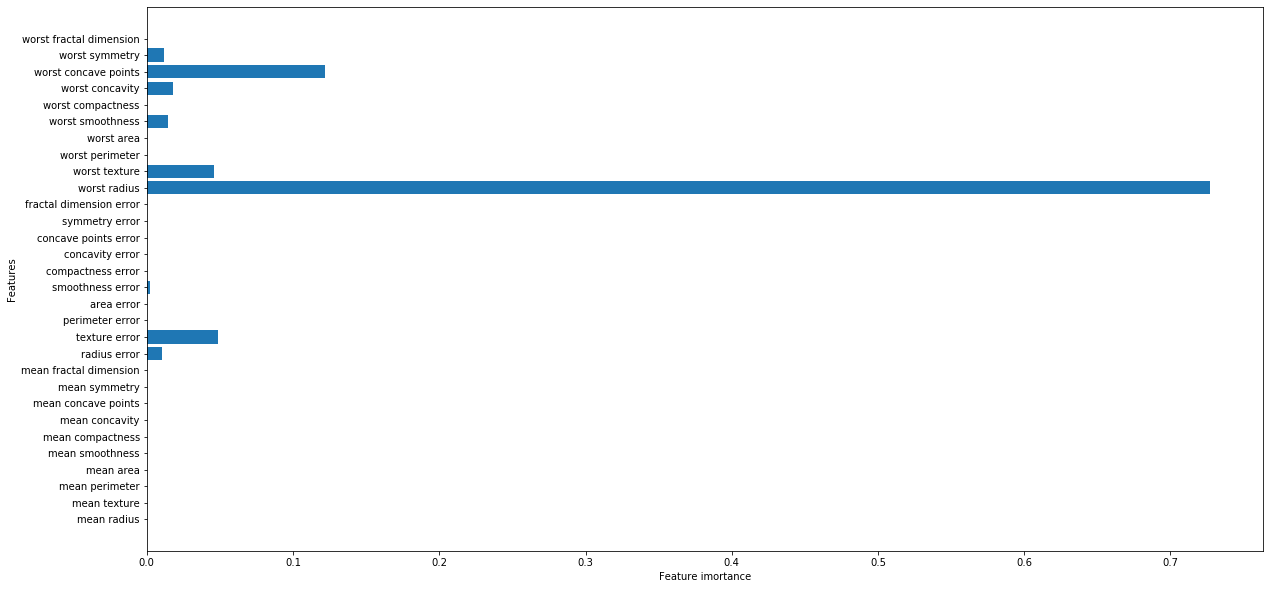

In [18]:
import matplotlib.pyplot as plt

n_features = cancer.data.shape[1]

plt.figure(figsize=(20, 10))

plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature imortance')
plt.ylabel('Features')

plt.show()

Text(0, 0.5, 'Price in $/Mbyte')

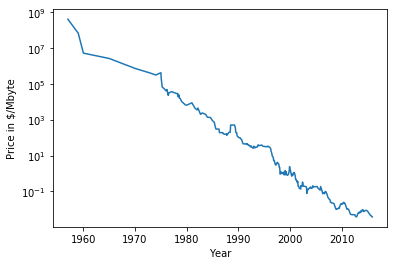

In [20]:
import os 
ram_prices = pd.read_csv(os.path.join('..\\ITML\\introduction_to_ml_with_python\\data\\ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [23]:
ram_prices

Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
328         328  2015.58  4.500000e-03
329         329  2015.67  4.300000e-03
330         330  2015.75  4.200000e-03
331         331  2015.83  3.800000e-03
332         332  2015.92  3.700000e-03

[333 rows x 3 columns]

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

Xtrain = np.array(data_train.date).reshape(-1, 1)
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis] # pandas Seriesをn行1列の1次元データに変換する方法。numpy arrayならreshape(-1, 1)に相当結締着

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Xtrain

array([[1957.  ],
       [1959.  ],
       [1960.  ],
       [1965.  ],
       [1970.  ],
       [1973.  ],
       [1974.  ],
       [1975.  ],
       [1975.08],
       [1975.25],
       [1975.75],
       [1976.  ],
       [1976.17],
       [1976.42],
       [1976.58],
       [1977.08],
       [1978.17],
       [1978.25],
       [1978.33],
       [1978.5 ],
       [1978.58],
       [1978.75],
       [1979.  ],
       [1979.75],
       [1980.  ],
       [1981.  ],
       [1981.58],
       [1982.  ],
       [1982.17],
       [1982.67],
       [1983.  ],
       [1983.67],
       [1984.  ],
       [1984.58],
       [1985.  ],
       [1985.33],
       [1985.42],
       [1985.5 ],
       [1985.58],
       [1985.67],
       [1985.83],
       [1985.92],
       [1986.  ],
       [1986.08],
       [1986.17],
       [1986.25],
       [1986.33],
       [1986.42],
       [1986.5 ],
       [1986.58],
       [1986.67],
       [1986.75],
       [1986.92],
       [1987.  ],
       [1987.08],
       [19

# 決定木のアンサンブル法
## ランダムフォレストの構築
bootは、コンピュータを起動するという意味がある。

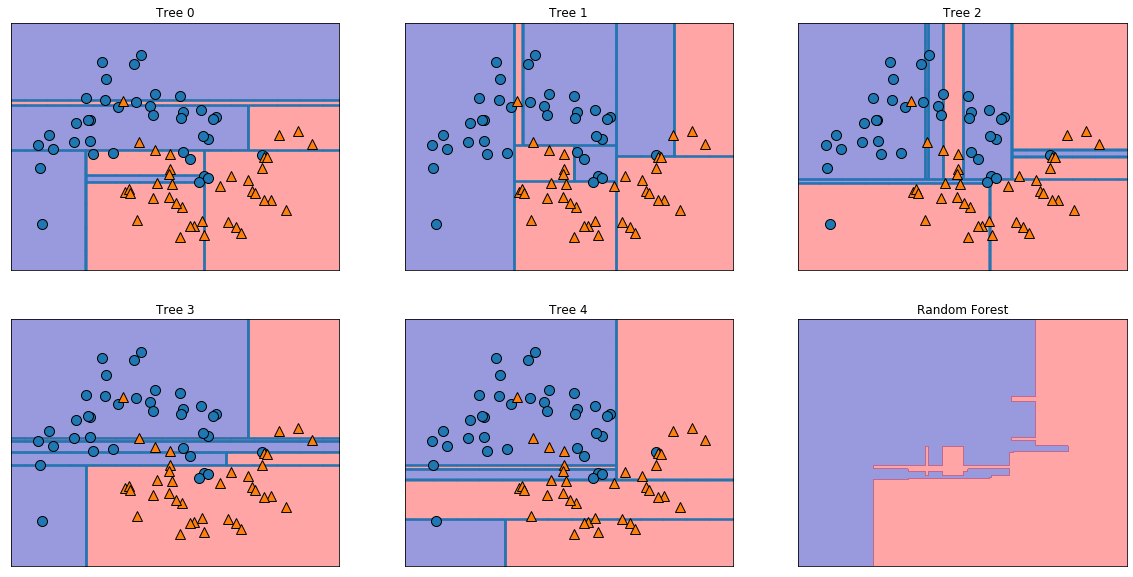

In [6]:
# from preamble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from mglearn.plot_2d_separator import plot_2d_separator
import mglearn
import sklearn
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)

axes[-1, -1].set_title('Random Forest')

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=794921487, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

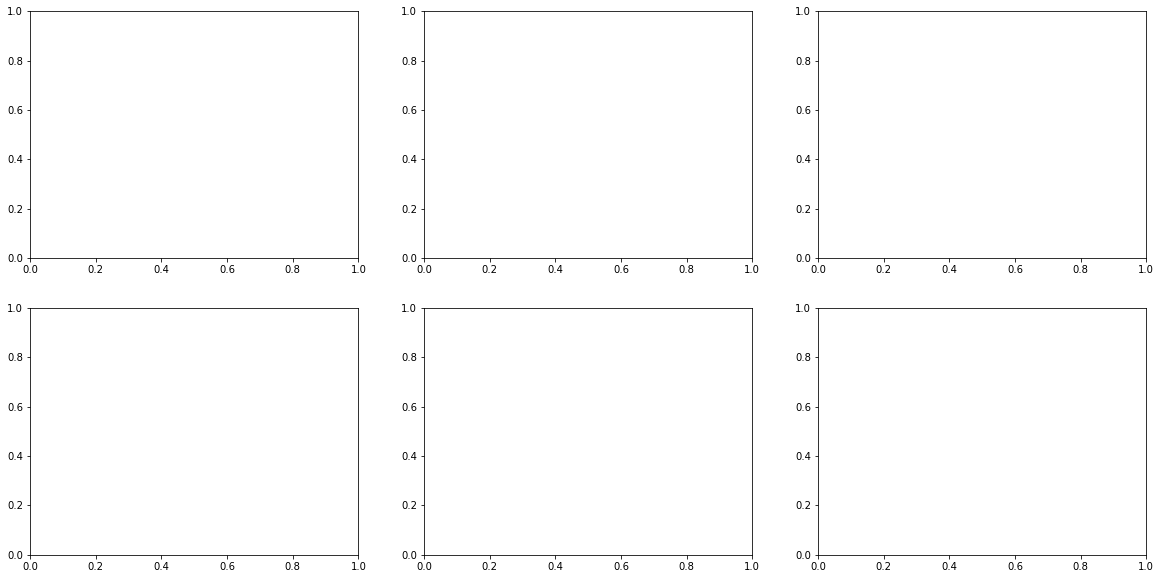

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
print(axes.ravel())
forest.estimators_

[plt.gca()の使い方](https://stackoverflow.com/questions/45381589/how-does-plt-gca-work-internally)

## 勾配ブースティング回帰木

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('Accuracy on training set: {}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.965034965034965


In [24]:
# 過学習しているので深さを調整

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print('Accuracy on training set: {}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.972027972027972


In [25]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('Accuracy on training set: {}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.965034965034965


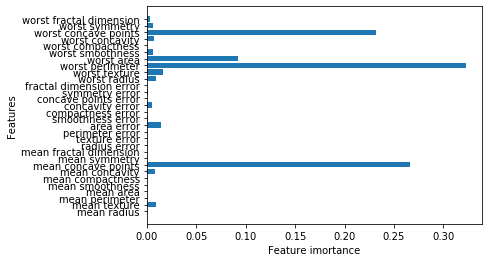

In [28]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature imortance')
    plt.ylabel('Features')

plot_feature_importances_cancer(gbrt)

# カーネル法を用いたサポートベクタマシン

Text(0, 0.5, 'Feature 1')

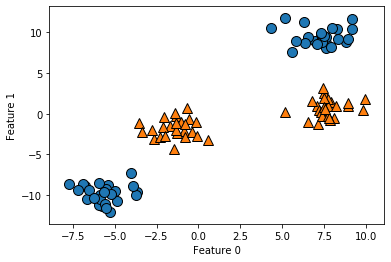

In [24]:
from sklearn.datasets import make_blobs
from mglearn.plot_helpers import discrete_scatter
import matplotlib.pyplot as plt

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

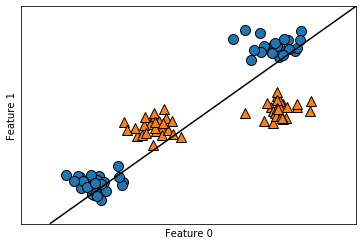

In [25]:
from sklearn.svm import LinearSVC
from mglearn.plot_2d_separator import plot_2d_separator

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

[hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)

In [26]:
X_new = np.hstack([X, X[:, 1:]**2])
print('X**2: ',(X**2).shape, '\n', X**2)
print('X[:, 1]**2: ', (X[:, 1]**2).shape, '\n', X[:, 1]**2)
print('X[:, 1:]**2: ', (X[:, 1:]).shape, '\n', (X[:, 1:]**2))

X**2:  (100, 2) 
 [[2.96394225e+00 2.19138111e+00]
 [1.33761242e+01 9.11688546e+01]
 [5.00954836e+01 9.90199567e-01]
 [1.86540579e+00 9.91383928e-02]
 [7.10335532e+00 9.77135405e+00]
 [5.82210380e+01 7.56548444e+01]
 [2.77881145e+01 1.46865483e+02]
 [6.26895202e+01 2.00356628e+00]
 [1.99612207e+00 1.27607478e-02]
 [1.03061152e+00 1.06746511e+00]
 [6.82840390e+01 1.07065259e+02]
 [4.85485460e+01 8.03219662e+01]
 [7.18752110e-01 4.50227339e+00]
 [5.59513331e+01 6.21968311e+00]
 [5.95142766e+01 3.39322225e+00]
 [5.99176095e+01 7.42700522e+01]
 [2.92775395e+01 7.60281596e+01]
 [5.17922943e+00 8.39260472e+00]
 [1.57925590e+00 5.44831313e+00]
 [5.79467927e+01 8.92337682e+01]
 [7.77122755e+01 7.68052501e+01]
 [5.16894193e+01 1.85675227e-01]
 [5.48033286e+01 8.39454878e+01]
 [2.67505820e+01 1.38783657e+02]
 [4.43001951e+00 2.49155720e+00]
 [4.26962884e+01 8.94031408e+01]
 [5.77045478e+01 6.43171198e+01]
 [4.30401727e-01 4.76058774e-01]
 [2.36284244e+01 1.16076071e+02]
 [7.93639429e+01 9.557988

[演算子優先度](https://pyprg.com/?p=204)

Text(0.5, 0, 'feature1 ** 2')

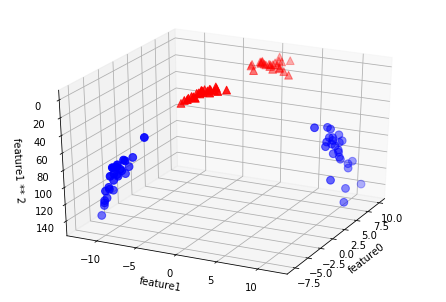

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
import matplotlib.pyplot as plt 

X_new = np.hstack([X, X[:, 1:]**2])

figure = plt.figure()
# azimは方位角
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

In [50]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
mask_even = np.array([False, True]*5)
a[mask_even]

array([ 2,  4,  6,  8, 10])

(3,)

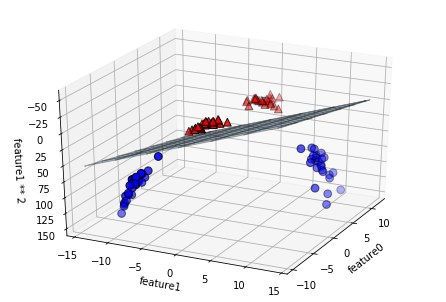

In [70]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3, edgecolor='k')
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")
linear_svm_3d.coef_.ravel().shape
# print('XX\n', XX)

# print('YY\n', YY)

898

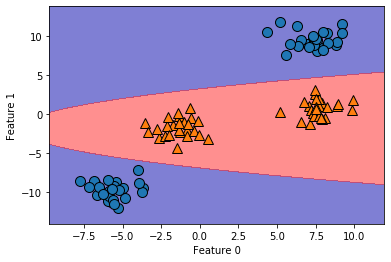

In [79]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
dec.max()

# サポートベクタを理解する

array([-10.        ,  -6.25178295,  -3.73381586,  10.        ,
         9.98559881])

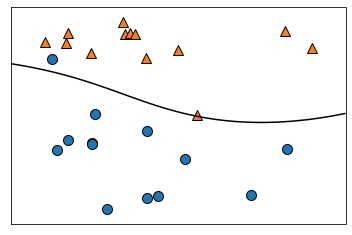

In [14]:
from sklearn.svm import SVC 
import mglearn
X, y= mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.dual_coef_.ravel()
sv

[SVM](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72#:~:text=Introduction,hyperplane%20which%20categorizes%20new%20examples.)

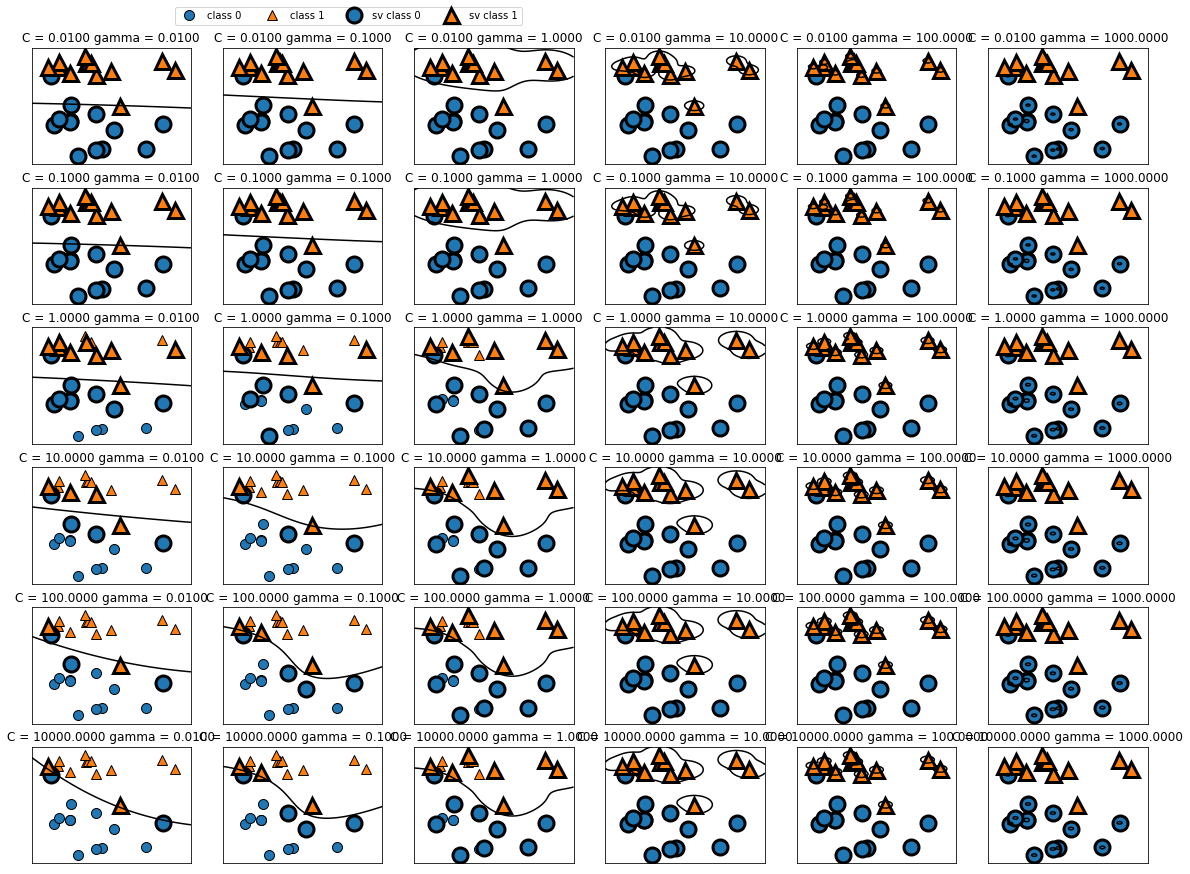

In [86]:
fig, axes = plt.subplots(6, 6, figsize=(20, 15))

for ax, C in zip(axes, [-2, -1, 0, 1, 2, 4]):
    for a, gamma in zip(ax, range(-2, 4)):
    # for a, gamma in zip(ax, [-2, 0, 3]):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC(gamma=1/cancer.feature_names.shape[0])
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


In [106]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = X_train.max(axis=0) - min_on_training
# range_on_training2 = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

# # min_on_training
# print(range_on_training)
# print(range_on_training2)

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[2.11290e+01 2.41000e+01 1.44710e+02 2.35750e+03 9.20700e-02 2.92020e-01
 4.26800e-01 2.01200e-01 1.98000e-01 4.74800e-02 2.76150e+00 4.52220e+00
 2.12230e+01 5.34972e+02 2.16170e-02 1.04148e-01 3.96000e-01 5.27900e-02
 5.35780e-02 2.89452e-02 2.81100e+01 3.75200e+01 2.00790e+02 4.06880e+03
 1.51430e-01 1.03071e+00 1.25200e+00 2.90300e-01 5.07300e-01 1.52460e-01]
[2.11290e+01 2.41000e+01 1.44710e+02 2.35750e+03 9.20700e-02 2.92020e-01
 4.26800e-01 2.01200e-01 1.98000e-01 4.74800e-02 2.76150e+00 4.52220e+00
 2.12230e+01 5.34972e+02 2.16170e-02 1.04148e-01 3.96000e-01 5.27900e-02
 5.35780e-02 2.89452e-02 2.81100e+01 3.75200e+01 2.00790e+02 4.06880e+03
 1.51430e-01 1.03071e+00 1.25200e+00 2.90300e-01 5.07300e-01 1.52460e-01]


Signature: np.var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
Docstring:
Compute the variance along the specified axis.

Returns the variance of the array elements, a measure of the spread of a
distribution.  The variance is computed for the flattened array by
default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Array containing numbers whose variance is desired.  If `a` is not an
    array, a conversion is attempted.
axis : None or int or tuple of ints, optional
    Axis or axes along which the variance is computed.  The default is to
    compute the variance of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a variance is performed over multiple axes,
    instead of a single axis or all the axes as before.
dtype : data-type, optional
    Type to use in computing the variance.  For arrays of integer type
    the default is `float64`; for arrays of float types it is the same as
    the array type.
